<a href="https://colab.research.google.com/github/sakshitiwari1234/DataScience_Projects/blob/main/Currency_Exchange_Rate_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Currency Exchange Rate Forecasting

## Overview

The currency conversion rate or exchange rate is an important economic indicator which affects several sectors, such as import-export businesses, foreign investment and tourism. By analyzing past data and predicting future exchange rates, we can gain valuable insights to help stakeholders reduce risk, optimize currency conversions, and design effective financial strategies. This project revolve around making analysis and predicting the currency rate exchange and its affects on various sectors.

## What is Currency Exchange Rate ?

Currency exchange rate forecasting means predicting future fluctuations in the value of one currency against another. It involves the use of historical data, economic indicators, and mathematical models to make accurate predictions about the direction and magnitude of exchange rate movements.

It helps individuals, businesses,  and financial institutions to anticipate market trends, mitigate risk, optimize currency conversions and plan strategic decisions.

### Task / Problem ->

1. The key task of this analysis is to analyze historical USD – INR exchange rate data and develop a forecasting model to predict future exchange rates.
2. The goal is to help individuals, businesses, and financial institutions make informed decisions about foreign exchange and international trade.

Importing the libraries and getting started.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/INR-USD.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0
...,...,...,...,...,...,...,...
1011,2023-04-17,81.844803,82.375504,81.844803,82.140900,82.140900,0.0
1012,2023-04-24,82.054802,82.154900,81.603996,81.745399,81.745399,0.0
1013,2023-05-01,81.744797,81.950996,81.616997,81.716103,81.716103,0.0
1014,2023-05-08,81.729797,82.148499,81.673401,81.787102,81.787102,0.0


chcking if there is any null value or not.

In [ ]:
data.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [ ]:
# rpelacing the null value using dropna function
data.dropna(inplace =True)

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# A descriptive statistics of the mentione data is as follows.

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0
mean,58.035208,58.506681,57.654706,58.056509,58.056509,0.0
std,12.614635,12.716632,12.565279,12.657407,12.657407,0.0
min,38.995998,39.334999,38.979000,39.044998,39.044998,0.0
25%,45.508999,45.775002,45.231998,45.498001,45.498001,0.0
50%,59.702999,60.342999,59.209999,59.840000,59.840000,0.0
75%,68.508499,69.099998,68.250000,68.538002,68.538002,0.0
max,82.917999,83.386002,82.563004,82.932999,82.932999,0.0


figuring out the trend in rate of exchange between INR and USD currency exchange.

In [ ]:
figure = px.line(data, x= 'Date', y = 'Close', title = "USD - INR conversion rate over the years")
figure.show()

In [ ]:
# adding the year and month column in the data moving forward
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data['Year']  = data["Date"].dt.year
data['Month'] = data["Date"].dt.month


In [ ]:
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


a look at the aggregated yearly growth of the conversion rates between INR and USD:

In [17]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

monthly growth.

In [25]:
data['Growth'] = data.groupby(['Year', "Month"]) [ 'Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]/ x.iloc[0] * 100))


# group data by month and callculating the average growth
grouped_Data = data.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = grouped_Data['Month'], y = grouped_Data['Growth'], marker_color = grouped_Data['Growth'], hovertemplate =' Month: %{x}<br> Average Growth: % {y:.2f}% <extra><extra>'))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=600,
    height=400
)

pio.show(fig)

Forecasting Exchange Rates Using Time Series Forecasting

We will use time series forecasting to forecast exchange rates. To choose the most appropriate time series forecasting model, we need to perform seasonal decomposition, which will help us identify any recurring patterns, long-term trends, and random fluctuations present in the USD – INR exchange rate data:

<Figure size 640x480 with 0 Axes>

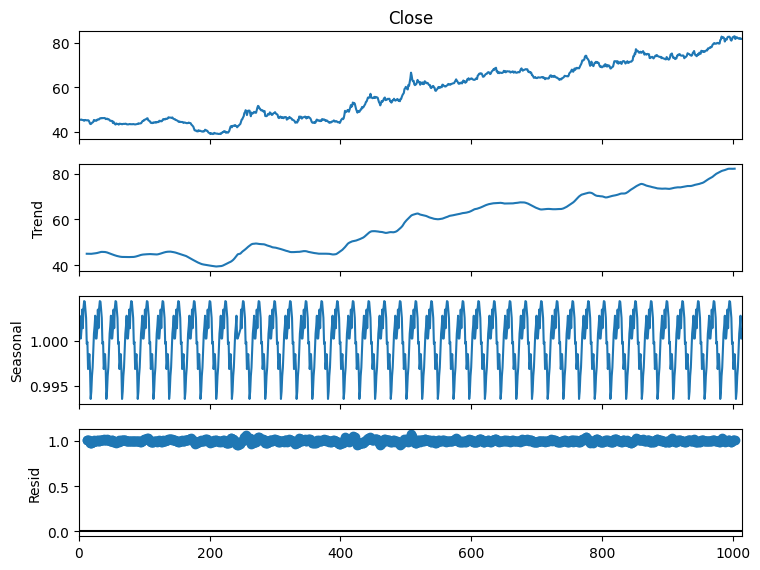

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

In [31]:
!pip install pmdarima

from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(p, d, q),
                seasonal_order=(p, d, q, 52))
fitted = model.fit()
print(fitted.summary())

NameError: name 'p' is not defined

In [30]:
predictions = fitted.predict(len(data), len(data)+60)
print(predictions)

NameError: name 'fitted' is not defined

In [ ]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)

## conclusions-



Currency exchange rate forecasting means predicting future fluctuations in the value of one currency against another. It involves the use of historical data, economic indicators, and mathematical models to make accurate predictions about the direction and magnitude of exchange rate movements. I hope you liked this article on Currency Exchange Rate Forecasting using Python.